In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from utils import *

pnl = pd.read_csv('total_pnl.csv').set_index('date')
pnl

,stock_future_short_trend_pnl,stock_future_after_day_stat_pnl,commodity_future_mid_trend_pnl,commodity_future_term_structure_pnl,volatility_option_pricing_pnl,commodity_future_pair_trend_trading_pnl,commodity_future_short_trend_pnl,commodity_future_long_trend_pnl,commodity_future_industry_regression_pnl,commodity_future_production_willingness_pnl,commodity_future_inventory_cross_section_pnl
date,,,,,,,,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000400,1.000640,1.000500,1.000300,1.000560
2016-01-05,0.993129,1.000000,1.000225,1.000000,1.001660,1.000000,0.998358,1.000960,1.000750,0.996744,0.997905
2016-01-06,1.003892,1.001581,1.000308,1.000880,1.021356,1.001974,0.999458,1.002104,1.001000,0.995398,0.997938
2016-01-07,1.003892,1.001058,1.000508,1.005149,1.026865,1.001974,1.000332,0.999545,1.001251,0.991421,0.996494
2016-01-08,1.023796,1.001928,1.000407,0.963970,1.030168,1.001974,0.994906,0.987063,1.001501,0.987914,0.996773
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1.810221,2.561376,2.044447,2.283416,2.042655,2.543051,2.899468,2.946174,2.377459,2.304494,2.919794
2023-12-26,1.811303,2.560724,2.043540,2.284470,2.045134,2.543051,2.900048,2.954567,2.376833,2.304839,2.915474
2023-12-27,1.819295,2.554985,2.045662,2.286826,2.046448,2.543051,2.900628,2.947232,2.376205,2.305185,2.913305


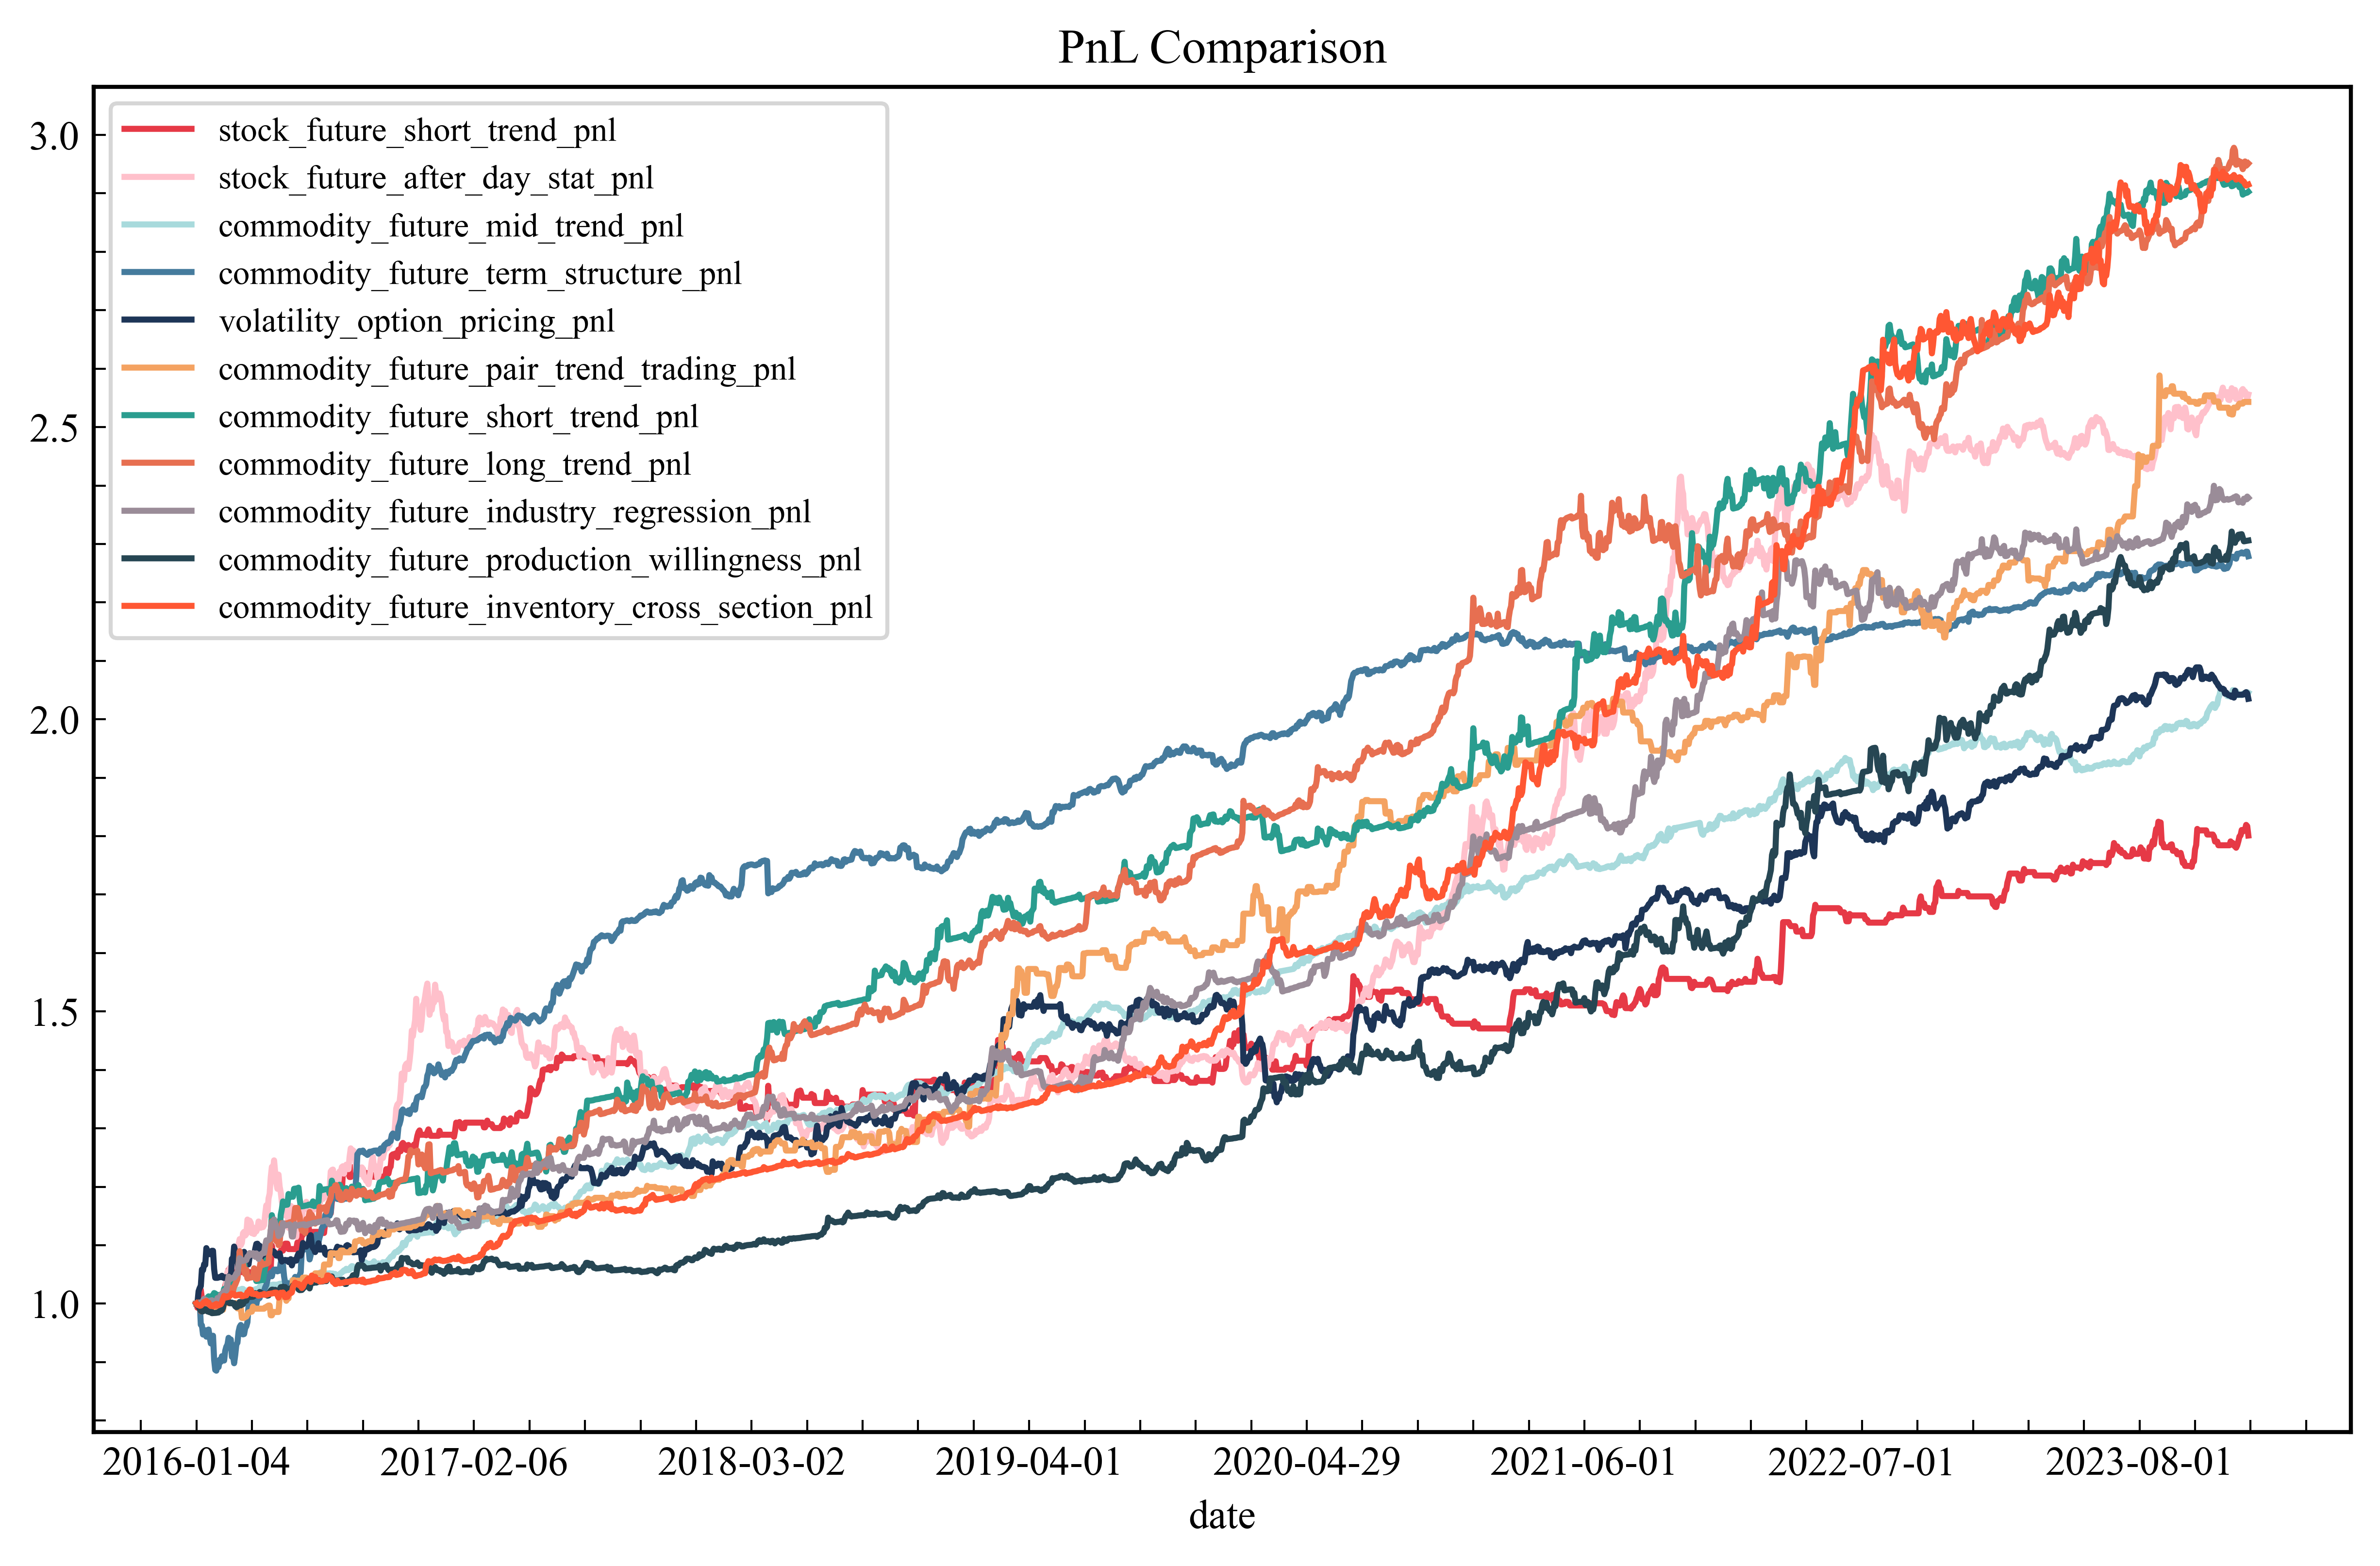

In [2]:
colorset = ['#E63946', '#FFC0CB', '#A8DADC', '#457B9D', '#1D3557',
            '#F4A261', '#2A9D8F', '#E76F51', '#9A8C98', '#264653',
            '#FF5733']

fig, ax = plt.subplots(figsize=(10, 6), dpi=600)
for i, col in enumerate(pnl.columns):
    pnl[col].plot(ax=ax, label=col,color=colorset[i])

# 设置网格和小刻度线
#ax.grid(True, which='both', linestyle='-', linewidth=3)
ax.minorticks_on()

# 设置边框和边框上的刻度线
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# 设置顶部和右侧的刻度线
ax.tick_params(axis='both', which='both', direction='in',length=3, width=0.5, colors='black', bottom=True, left=True)

ax.tick_params(axis='x', rotation=0)  # 设置x轴刻度不旋转
# 添加图例和标题
ax.legend(fontsize='small')  # 设置图例字体大小为大号
ax.set_title('PnL Comparison')

# 显示图形
plt.savefig('PNL Overall',bbox_inches='tight')
plt.show()

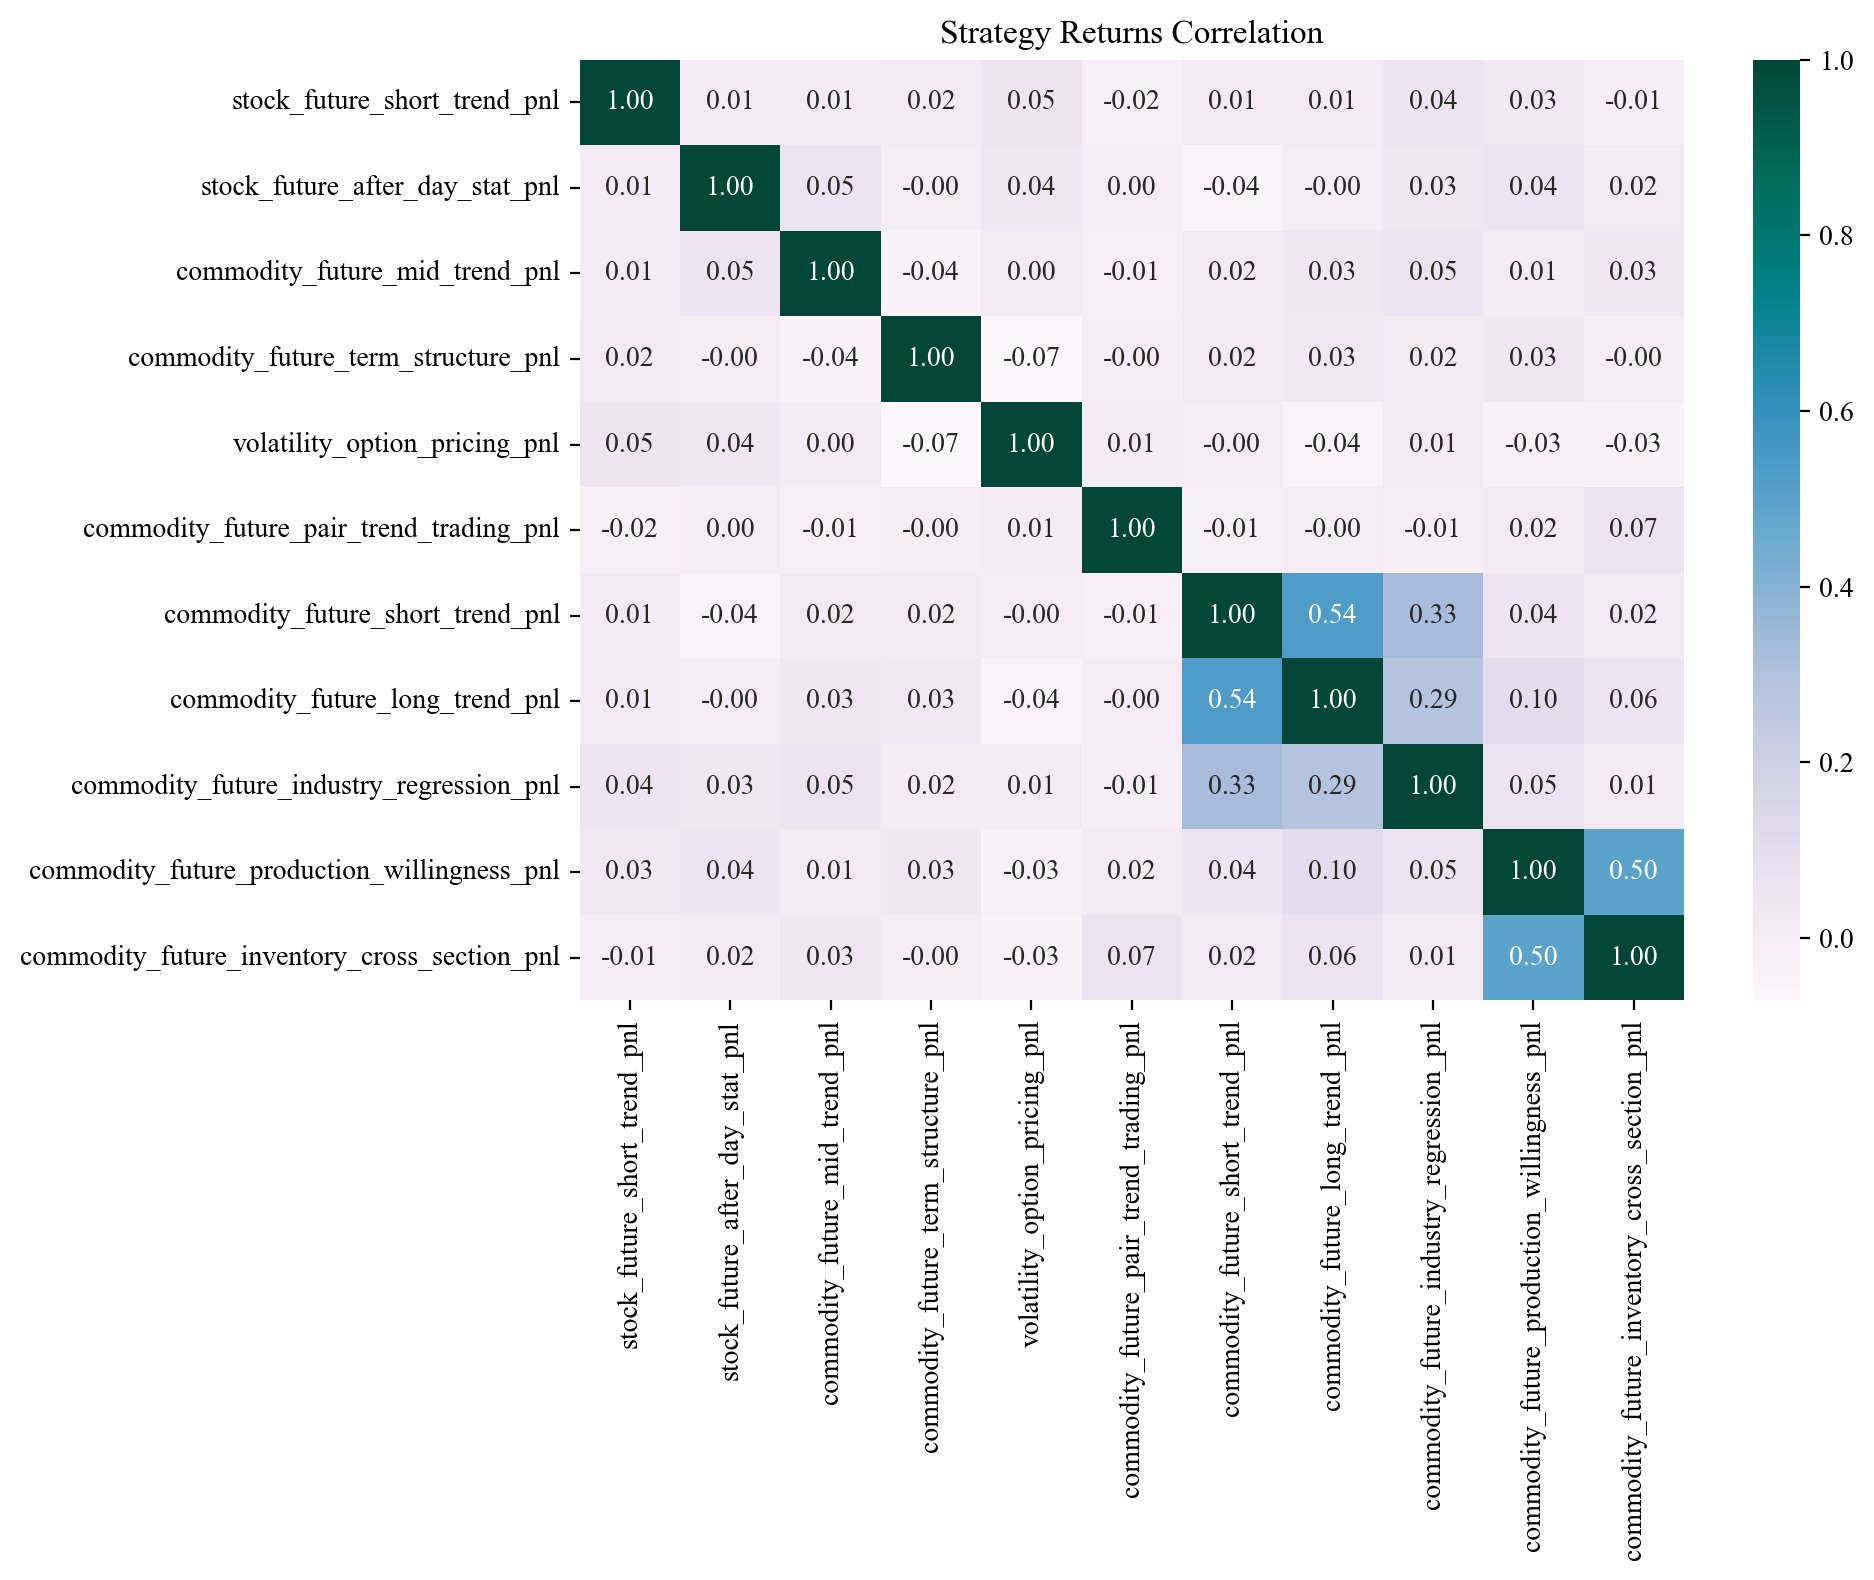

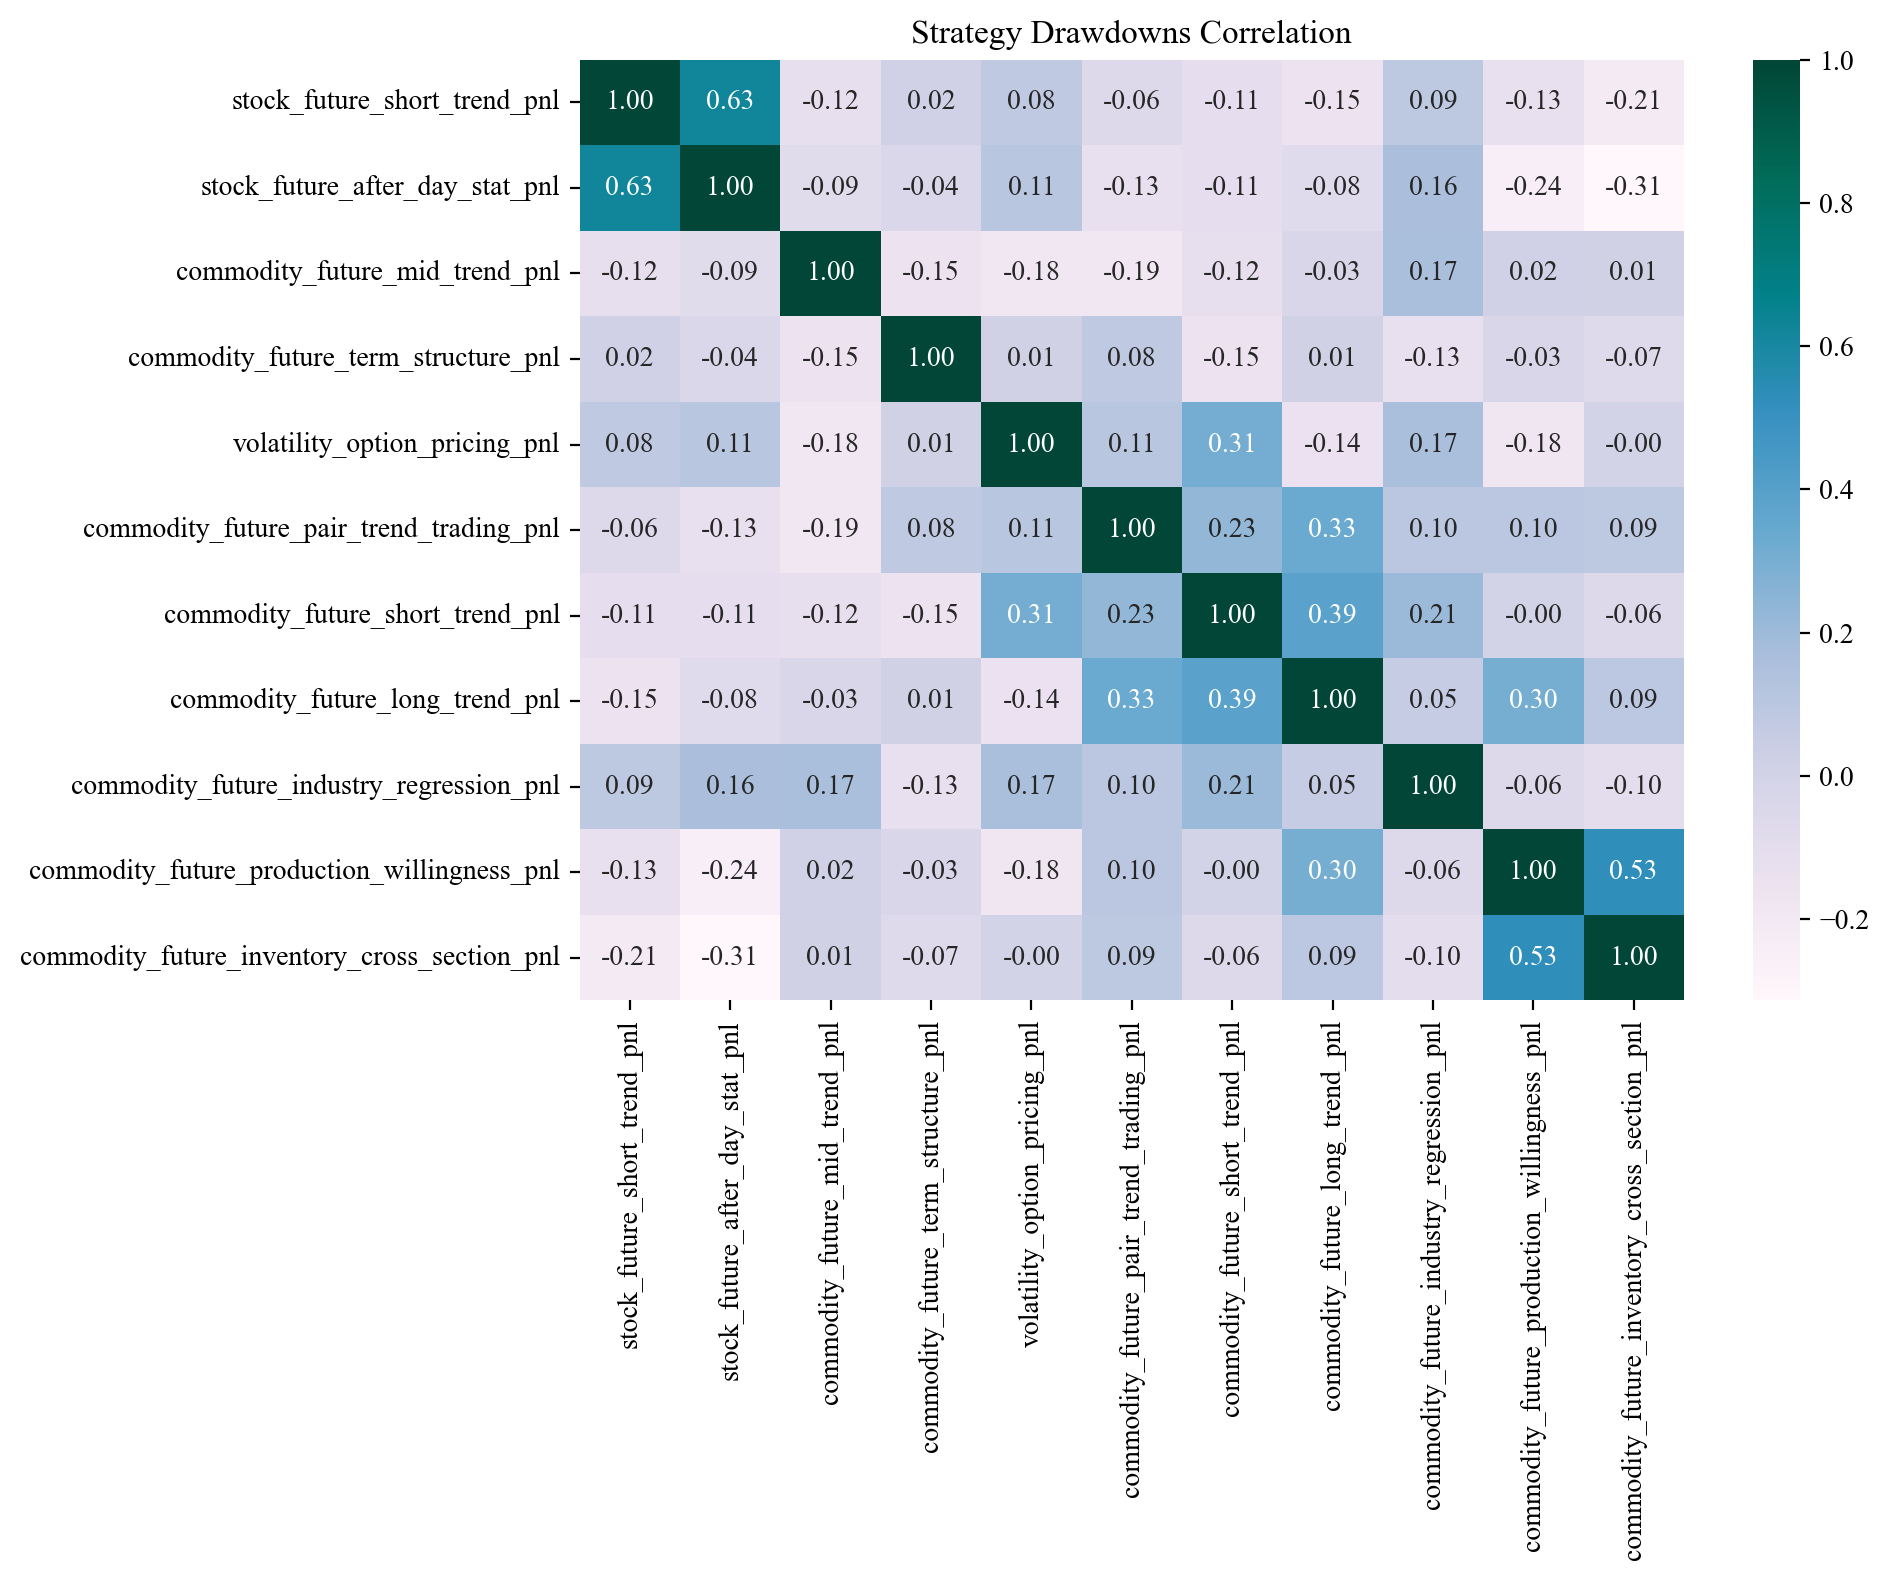

In [3]:
analysis = PnLAnalysis(pnl)
analysis.strategy_returns_correlation()
analysis.strategy_drawdowns_correlation()

## overall 1.5 times leverage, calculated by volatility normalization

In [4]:
w_list = [0.15,0.1,0.25,0.15,0.15,0.1,0.1,0.1,0.1,0.15,0.15]
weight_dict = {index:None for index in pnl.columns}
for i in range(len(pnl.columns)):
    key, value = pnl.columns[i], w_list[i]
    weight_dict[key] = value
weight_dict

{'stock_future_short_trend_pnl': 0.15,
 'stock_future_after_day_stat_pnl': 0.1,
 'commodity_future_mid_trend_pnl': 0.25,
 'commodity_future_term_structure_pnl': 0.15,
 'volatility_option_pricing_pnl': 0.15,
 'commodity_future_pair_trend_trading_pnl': 0.1,
 'commodity_future_short_trend_pnl': 0.1,
 'commodity_future_long_trend_pnl': 0.1,
 'commodity_future_industry_regression_pnl': 0.1,
 'commodity_future_production_willingness_pnl': 0.15,
 'commodity_future_inventory_cross_section_pnl': 0.15}

In [5]:
series = pd.Series(0, index=pnl.index)

for key, values in weight_dict.items():
    series += values * pnl[key].pct_change()

pnl['balance'] = (1 + series).cumprod().fillna(1)
pnl

,stock_future_short_trend_pnl,stock_future_after_day_stat_pnl,commodity_future_mid_trend_pnl,commodity_future_term_structure_pnl,volatility_option_pricing_pnl,commodity_future_pair_trend_trading_pnl,commodity_future_short_trend_pnl,commodity_future_long_trend_pnl,commodity_future_industry_regression_pnl,commodity_future_production_willingness_pnl,commodity_future_inventory_cross_section_pnl,balance
date,,,,,,,,,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000400,1.000640,1.000500,1.000300,1.000560,1.000000
2016-01-05,0.993129,1.000000,1.000225,1.000000,1.001660,1.000000,0.998358,1.000960,1.000750,0.996744,0.997905,0.998196
2016-01-06,1.003892,1.001581,1.000308,1.000880,1.021356,1.001974,0.999458,1.002104,1.001000,0.995398,0.997938,1.003322
2016-01-07,1.003892,1.001058,1.000508,1.005149,1.026865,1.001974,1.000332,0.999545,1.001251,0.991421,0.996494,1.003811
2016-01-08,1.023796,1.001928,1.000407,0.963970,1.030168,1.001974,0.994906,0.987063,1.001501,0.987914,0.996773,0.998910
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1.810221,2.561376,2.044447,2.283416,2.042655,2.543051,2.899468,2.946174,2.377459,2.304494,2.919794,3.638513
2023-12-26,1.811303,2.560724,2.043540,2.284470,2.045134,2.543051,2.900048,2.954567,2.376833,2.304839,2.915474,3.639545
2023-12-27,1.819295,2.554985,2.045662,2.286826,2.046448,2.543051,2.900628,2.947232,2.376205,2.305185,2.913305,3.641745


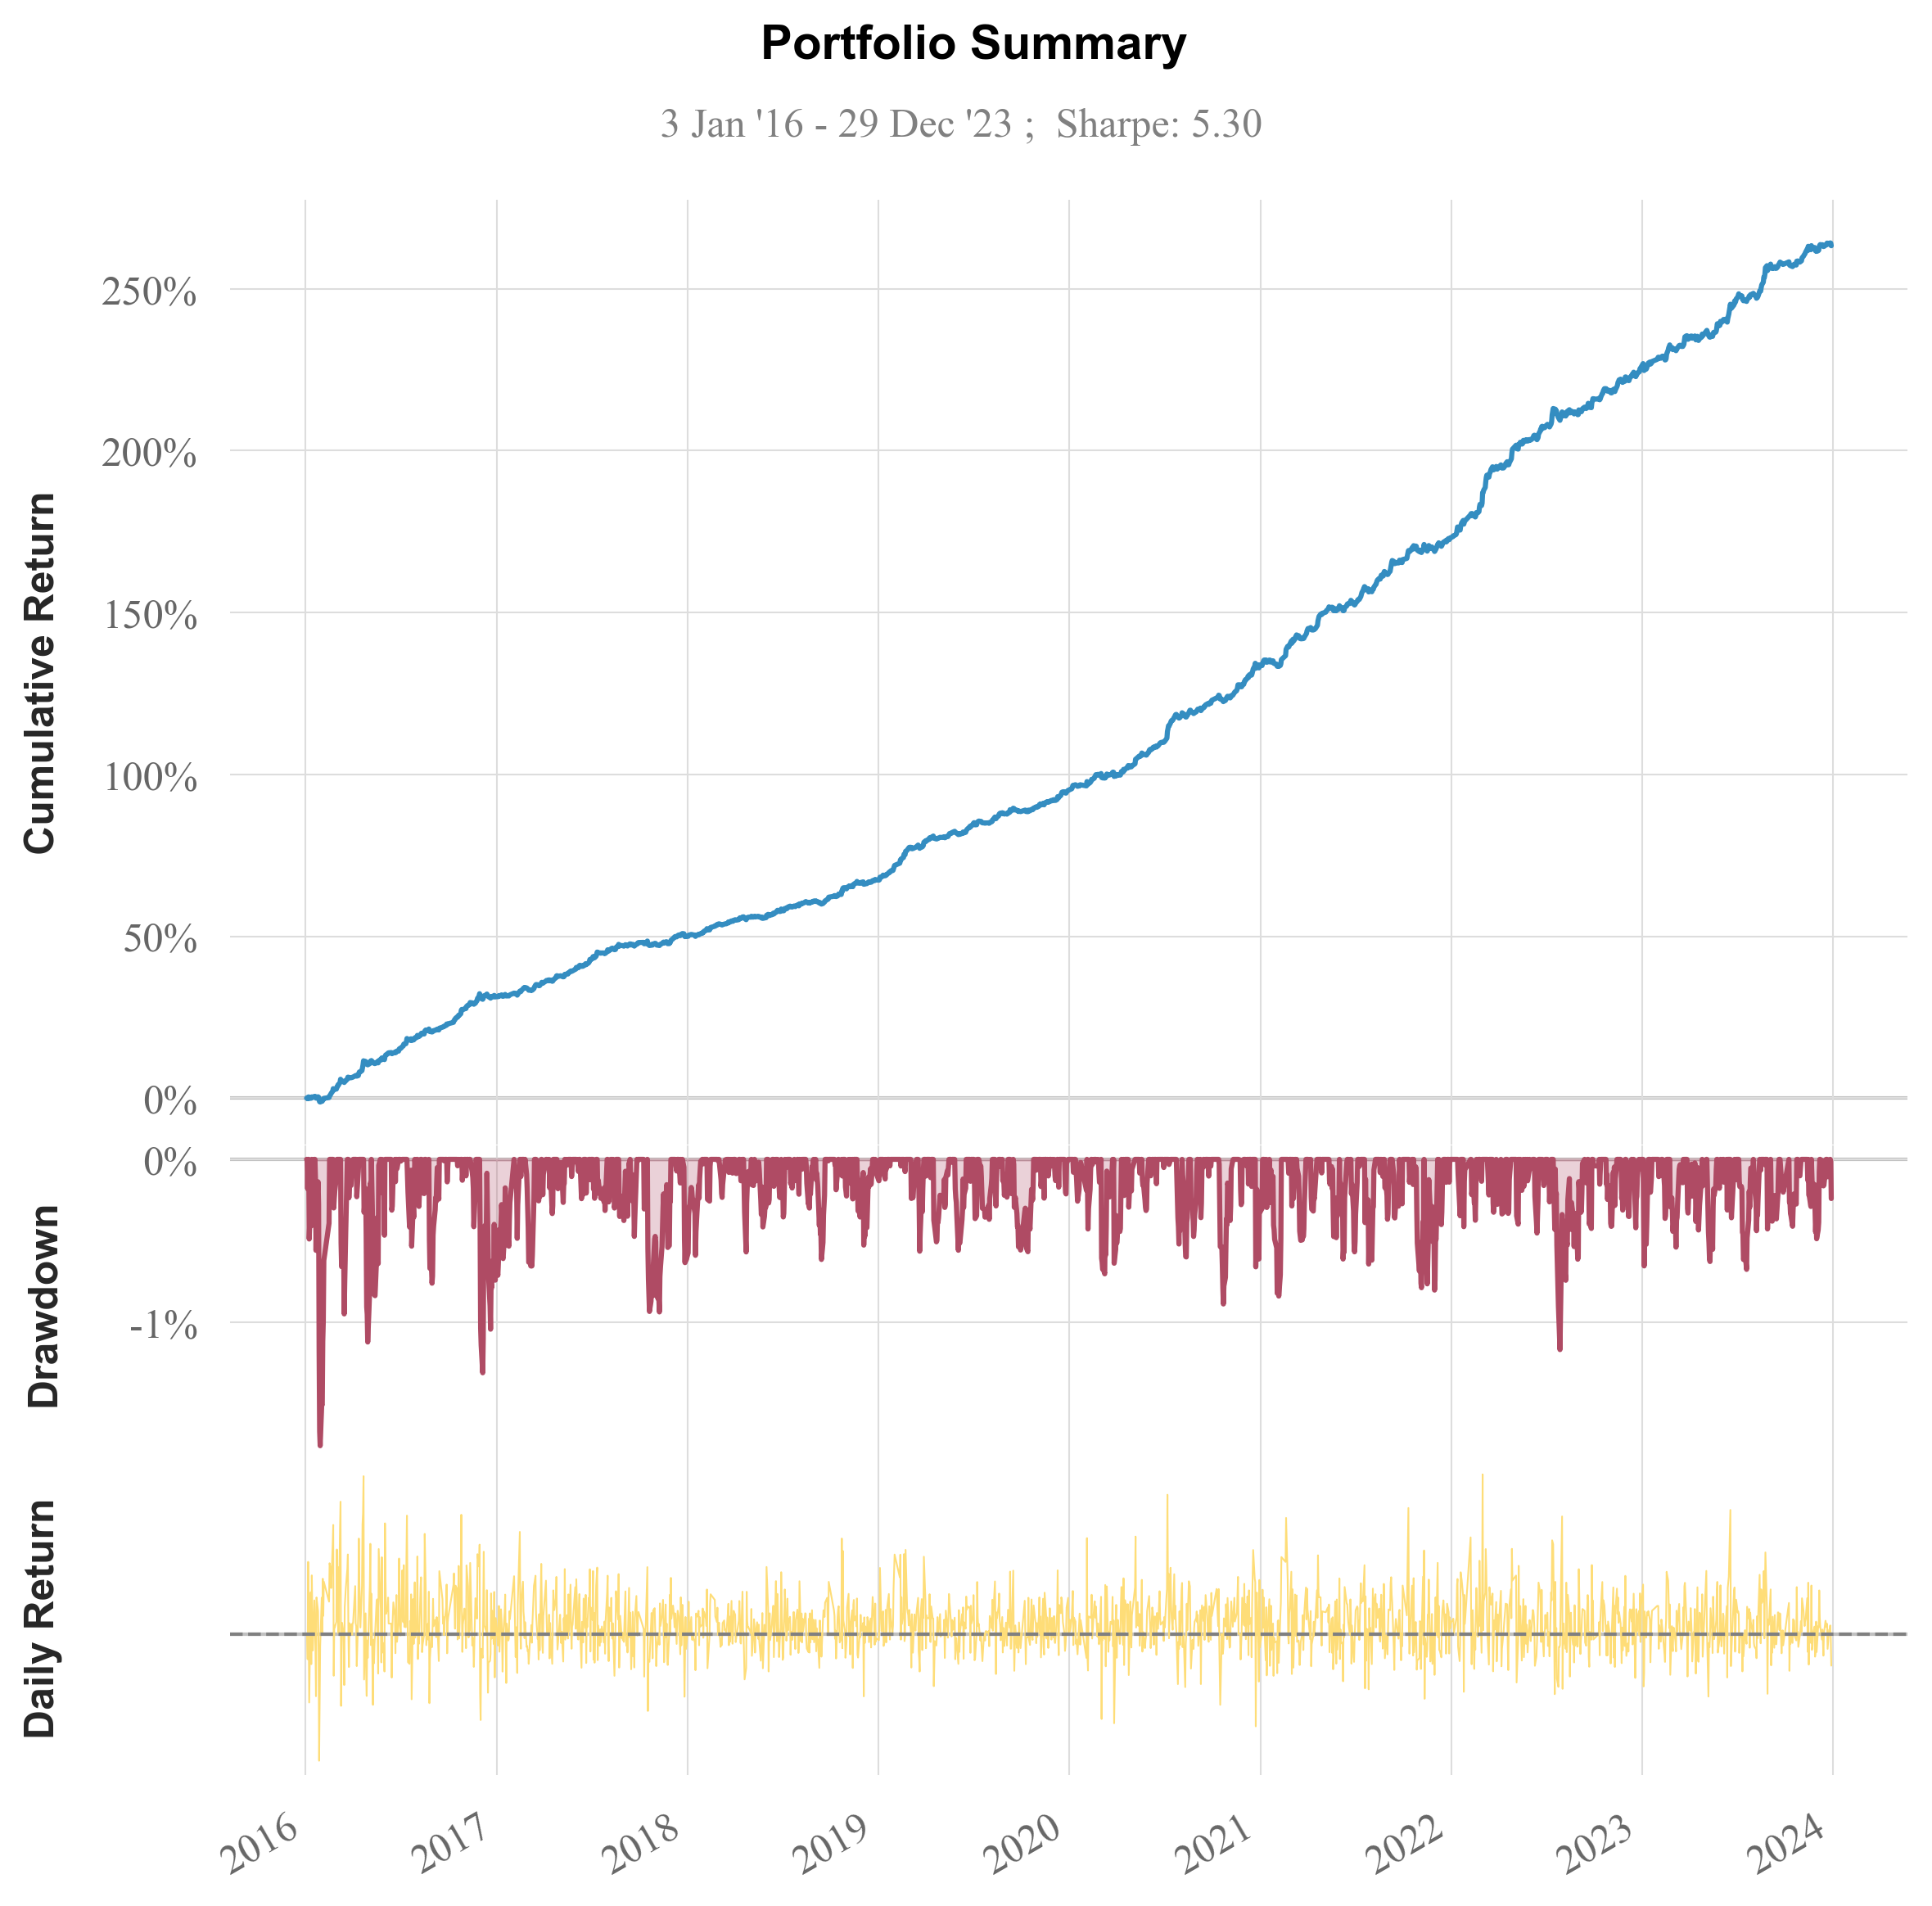

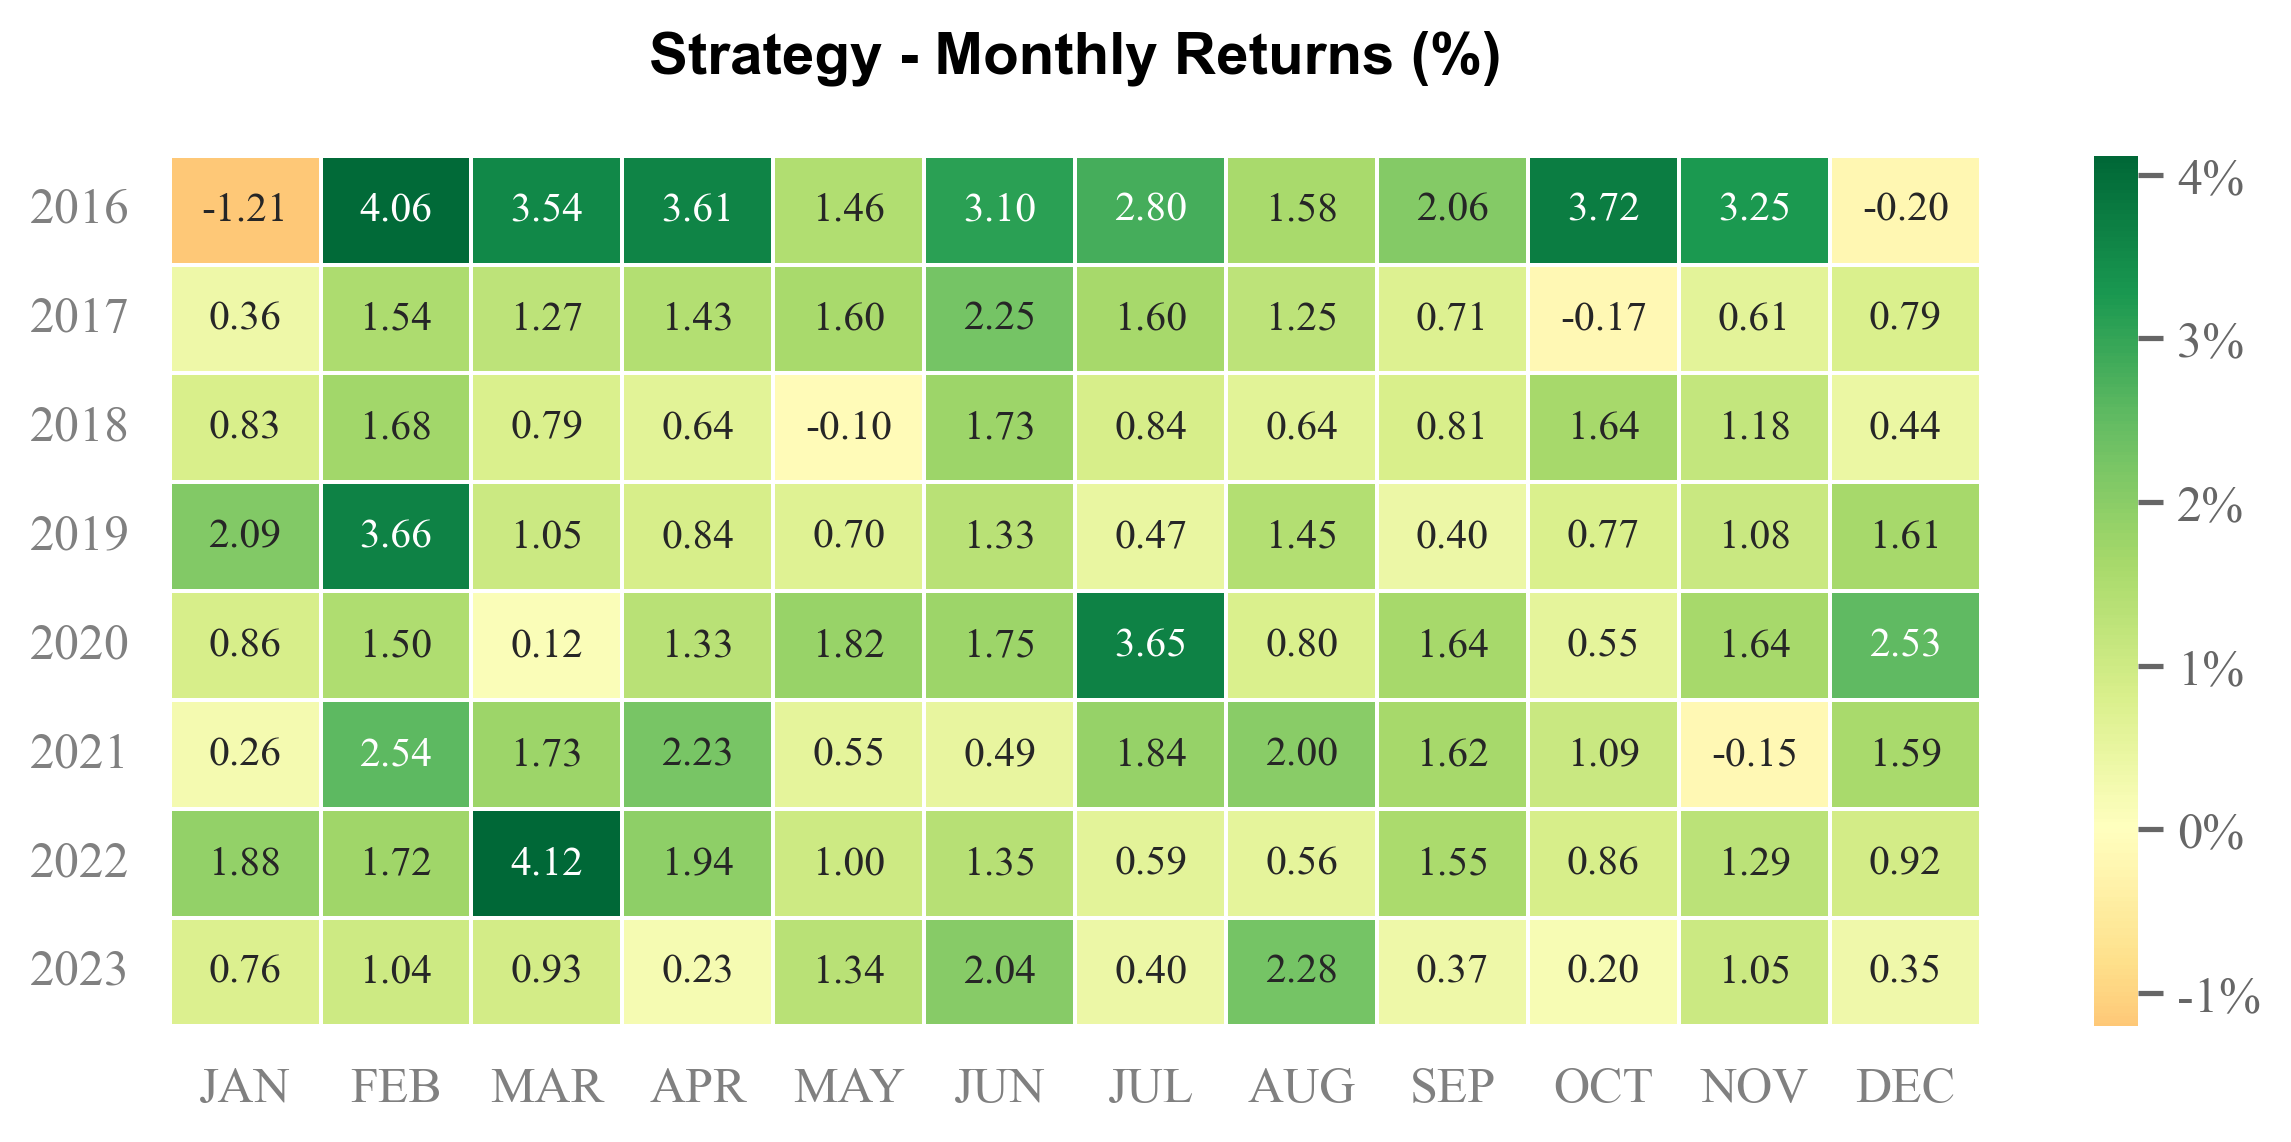

In [6]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import quantstats
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300
pnl.index = pd.to_datetime(pnl.index)
quantstats.reports.plots(returns=pnl['balance'],periods_per_year=252)

In [7]:
import warnings
warnings.filterwarnings('ignore')
df_concat = pd.DataFrame()
for i in pnl.columns:
    ret = quantstats.reports.metrics(pnl[i],periods_per_year=252,mode='base', display=False)
    ret.columns = [i]
    df_concat = pd.concat([df_concat, ret], axis=1)
df_concat.head(22)

,stock_future_short_trend_pnl,stock_future_after_day_stat_pnl,commodity_future_mid_trend_pnl,commodity_future_term_structure_pnl,volatility_option_pricing_pnl,commodity_future_pair_trend_trading_pnl,commodity_future_short_trend_pnl,commodity_future_long_trend_pnl,commodity_future_industry_regression_pnl,commodity_future_production_willingness_pnl,commodity_future_inventory_cross_section_pnl,balance
Start Period,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04
End Period,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29,2023-12-29
Risk-Free Rate,0,0,0,0,0,0,0,0,0,0,0,0
Time in Market,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cumulative Return,-,-,-,-,-,-,-,-,-,-,-,-
CAGR﹪,0.05,0.08,0.06,0.07,0.06,0.08,0.1,0.1,0.08,0.07,0.1,0.12
Sharpe,1.23,1.41,2.9,1.99,1.41,1.77,1.87,1.95,1.88,1.95,2.65,5.31
Prob. Sharpe Ratio,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Sortino,2.34,2.2,4.73,2.99,2.21,3.48,3.24,3.13,3.04,3.3,4.55,10.77
Sortino/√2,1.66,1.56,3.35,2.11,1.56,2.46,2.29,2.22,2.15,2.33,3.21,7.62
